# Tarea 3 - Clusterización

- Di Carlo, Martina
- Pastrana Analía
- Suárez Gilda

La Figura 1 muestra una imagen con 5 clusters. El objetivo de la tarea de clustering
es encontrar los 5 clusters y mostrarlos en colores diferentes. Tener en cuenta que
puede ser necesario utilizar mas de un algoritmo de clustering para realizar la tarea.
(3.5 pts)

![Clustering](clusters.jpg)

Para realizar la tarea se sugiere:  
&nbsp;&nbsp;&nbsp;&nbsp;  **a)** Utilizar la funcion imread del paquete matplotlib.image para cargar la imagen.
Ver el tutorial https://matplotlib.org/2.0.2/users/image_tutorial.html para más
informacion.  
&nbsp;&nbsp;&nbsp;&nbsp;  **b)** Tener en cuenta que la imagen de entrada clusters.jpg es en escala de grises
y tiene un tamaño de (306, 565). Cada valor dentro de la matriz, o pixel, tiene un
valor entre 0 (negro) y 255 (blanco) con tipo de dato np.uint8.  
&nbsp;&nbsp;&nbsp;&nbsp;  **c)** Para generar una imagen color equivalente hay que crear una matriz de (306,
565,3), donde tenemos 3 indices I, j, k que refiere a filas, columnas y “profundidad”.
Sobre la “profundidad” se codifica el color de la imagen. Por ejemplo, si en la imagen
img el pixel de la posicion (0, 0) es blanco entonces img[0, 0, :] = np.array([255, 255,
255]). La profundidad codifica 3 canales de color, RGB (Red, Green, Blue) y los
colores se obtienen como mezcla de estos 3 colores primarios. Si quisieramos
codificar 5 colores diferentes:
* 1) rojo: [255, 0, 0]
* 2) verde: [0, 255, 0]
* 3) azul: [0, 0, 255]
* 4) cyan: [0, 255, 255]
* 5) magenta: [255, 0, 255]  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **d)** La Figura 2 muestra la forma de indexar imagenes representadas por
matrices numpy. Notar que solo se indexa mediante filas y columnas y no se toma
Figura 1: clusters.jpg
en cuenta el color en este ejemplo. La funcion numpy.meshgrid puede ser util para
trabajar con los indices de una imagen.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold, GridSearchCV

import seaborn as sns

from pyprojroot import here

In [2]:
img=mpimg.imread(here() / 'clusters.jpg')

In [3]:
print(img.shape)

(306, 565, 3)


In [4]:
print(type(img[0,0]))

<class 'numpy.ndarray'>


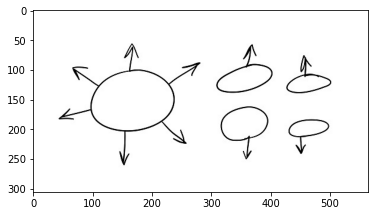

In [5]:
imgplot = plt.imshow(img)
imgplot

In [6]:
rows = np.arange(0, img.shape[1], 1)
cols = np.arange(0, img.shape[0], 1)

xx, yy = np.meshgrid(rows, cols)

In [7]:
print(xx.shape)
print(yy.shape)
print(img.shape)

(306, 565)
(306, 565)
(306, 565, 3)


In [8]:
lista = []
lista_x = []
lista_y = []

for x in range(0, 306):
    for y in range(0, 565):
        if all(num < 120 for num in img[x][y]):
            lista.append(img[x][y])
            lista_x.append(x)
            lista_y.append(y)

In [9]:
puntos = [list(x) for x in zip(lista_x, lista_y)]

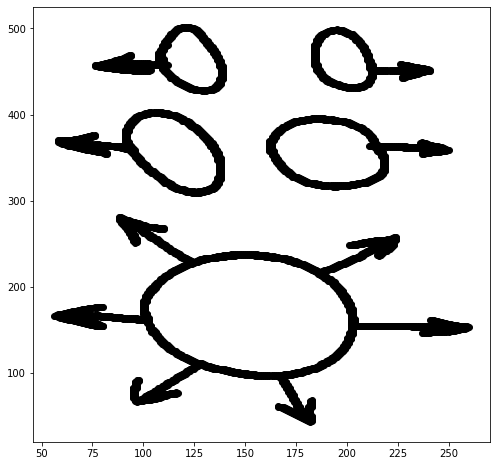

In [10]:
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(121)
ax.scatter(lista_x,  lista_y, c='k')

In [11]:
ag = AgglomerativeClustering(n_clusters=5, linkage='single')
L = ag.fit_predict(puntos)

Text(0.5, 1.0, 'AgglomerativeClustering')

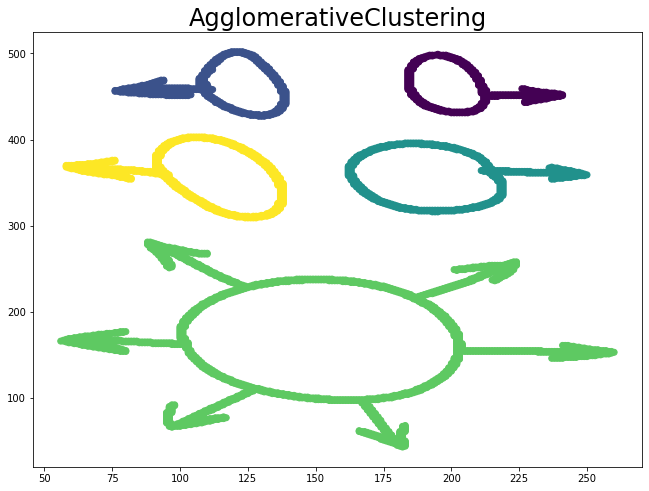

In [12]:
fig = plt.figure(figsize=(24,8))
ax = fig.add_subplot(121)
ax.scatter(lista_x, lista_y, c=L)
ax.set_title('AgglomerativeClustering', fontsize=24)


In [13]:
np.unique(L)

array([0, 1, 2, 3, 4], dtype=int64)

In [14]:
img_resultado = img.copy()

In [15]:
dicc_colores = {}
dicc_colores[0] = [255, 0, 0] #rojo
dicc_colores[1] = [0, 255, 0] # verde
dicc_colores[2] = [0, 0, 255] # azul
dicc_colores[3] = [0, 255, 255] #cyan
dicc_colores[4] = [255, 0, 255] #magenta

In [16]:
puntos[0][1]

166

In [17]:
img_resultado[puntos[0][0] , puntos[0][1]]

array([84, 84, 84], dtype=uint8)

In [18]:
for punto, i in zip(puntos, range(0, len(L))):
    #print(img_resultado[punto[0], punto[1]])
    #print(dicc_colores[L[i]])
    img_resultado[punto[0], punto[1]] = dicc_colores[L[i]]

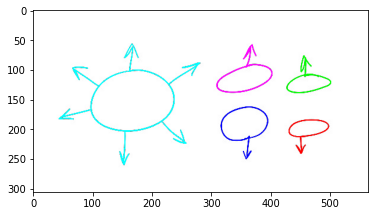

In [19]:
imgplot = plt.imshow(img_resultado)
imgplot